# WORLD HAPPINESS REPORT PROJECT


In [266]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

In [267]:
original_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [268]:
original_data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [269]:
#extracting group data with country as index
complet_data_summary = original_data.groupby("Country") 
complet_data_summary.mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,
Afghanistan,153.0,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
Albania,95.0,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
Algeria,68.0,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
Angola,137.0,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
Argentina,30.0,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
...,...,...,...,...,...,...,...,...,...,...
Venezuela,23.0,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
Vietnam,75.0,5.360,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
Yemen,136.0,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313


In [270]:
list(original_data.columns)

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [271]:
# Summary of Trust (Government Corruption) per year
Trust_df = original_data[["Country", "Trust (Government Corruption)"]]
Trust_df = Trust_df.groupby("Country")
Trust_df.mean()

#Find the averages of the data
GOV_df = Trust_df.mean().reset_index()
GOV_df["Gov Trust Average"] = GOV_df.mean(axis=1)
GOV_df

# Filter the DataFrame down only to those columns to chart
GOV_plot = GOV_df[["Country", "Gov Trust Average"]]

# Set the index to be "Country" so they will be used as labels
GOV_plot = GOV_plot.set_index("Country")
GOV_plot.head(200)


C:\Users\Pavan Krishna\AppData\Local\Temp\ipykernel_14764\2446448803.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  GOV_df["Gov Trust Average"] = GOV_df.mean(axis=1)


,Gov Trust Average
Country,
Afghanistan,0.09719
Albania,0.06413
Algeria,0.17383
Angola,0.07122
Argentina,0.08484
...,...
Venezuela,0.11069
Vietnam,0.10441
Yemen,0.07854


In [272]:
# List top 10 Countries with the highest average Government Trust Average

highest_10_GOV = GOV_plot.nlargest(10, ['Gov Trust Average'])
highest_10_GOV

,Gov Trust Average
Country,
Rwanda,0.55191
Qatar,0.52208
Singapore,0.49210
Denmark,0.48357
Sweden,0.43844
New Zealand,0.42922
Switzerland,0.41978
Finland,0.41372
Somaliland region,0.39928


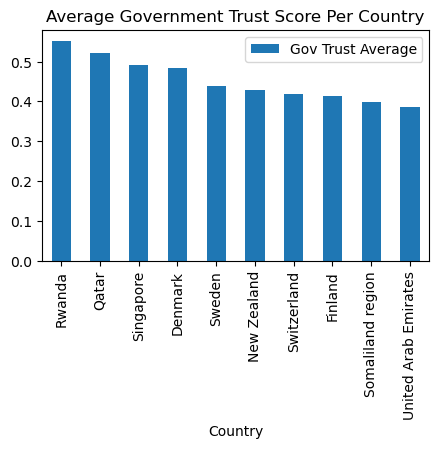

<Figure size 640x480 with 0 Axes>

In [273]:
#using dataframe.plot() in order to creat  bar chat
highest_10_GOV.plot(kind="bar", figsize=(5,3))

#set a title for the chart
plt.title("Average Government Trust Score Per Country")

plt.show()
plt.tight_layout()

In [274]:
#list of to 10 countries with lowest average
lowest_10_GOV = GOV_plot.nsmallest(10, ['Gov Trust Average'])
lowest_10_GOV

,Gov Trust Average
Country,
Indonesia,0.00000
Bosnia and Herzegovina,0.00227
Romania,0.00649
Bulgaria,0.00872
Lithuania,0.01031
Portugal,0.01078
Trinidad and Tobago,0.01140
Greece,0.01397
Moldova,0.01615


In [275]:
#summary of Generocity per year
Generocity_df = original_data[["Country", "Generosity"]]
Generocity_df = Generocity_df.groupby("Country")
Generocity_df.mean()

#find averages of the data
Gen_df = Generocity_df.mean().reset_index()
Gen_df["Generocity Average"] = Gen_df.mean(axis=1)
Gen_df

#filter the dataframe down only to those columns to chart
Gen_plot = Gen_df[["Country", "Generocity Average"]]

#set the index to "Country" so they will be used as lables
Gen_plot = Gen_plot.set_index("Country")
Gen_plot.head()

C:\Users\Pavan Krishna\AppData\Local\Temp\ipykernel_14764\1892964691.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Gen_df["Generocity Average"] = Gen_df.mean(axis=1)


,Generocity Average
Country,
Afghanistan,0.36510
Albania,0.14272
Algeria,0.07822
Angola,0.12344
Argentina,0.11451


In [276]:
#list top 10 counties with highest average Generocity avearge
highest_10_generocity = Gen_plot.nlargest(10, ['Generocity Average'])
highest_10_generocity

,Generocity Average
Country,
Myanmar,0.79588
Thailand,0.57630
United Kingdom,0.51912
Malta,0.51752
Indonesia,0.51535
Somaliland region,0.50318
Bhutan,0.47998
Netherlands,0.47610
New Zealand,0.47501


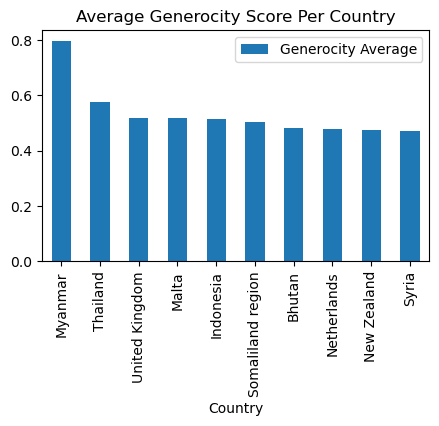

<Figure size 640x480 with 0 Axes>

In [277]:
#use Dataframe.plot() in order to creat a bar chart of the data
highest_10_generocity.plot(kind="bar", figsize=(5,3))

#set a title for the chart
plt.title("Average Generocity Score Per Country")

plt.show()
plt.tight_layout()

In [278]:
lowest_10_generocity = Gen_plot.nsmallest(10, ['Generocity Average'])
lowest_10_generocity

,Generocity Average
Country,
Greece,0.00000
Russia,0.00199
Lithuania,0.02641
Croatia,0.05444
Georgia,0.05547
Venezuela,0.05841
Tunisia,0.06431
Gabon,0.06822
Morocco,0.07172


In [330]:
#summary of Dystopia Residual
Dystopia_df = original_data[["Country", "Dystopia Residual"]]
Dystopia_df = Dystopia_df.groupby("Country")
Dystopia_df.mean()


,Dystopia Residual
Country,
Afghanistan,1.95210
Albania,1.89894
Algeria,2.43209
Angola,1.94939
Argentina,2.83600
...,...
Venezuela,3.19131
Vietnam,2.20173
Yemen,1.92313


In [331]:
#average of data
Dys_df = Dystopia_df.mean().reset_index()
Dys_df["Dystopia Residual Average"] = Dys_df.mean(axis=1)
Dys_df


C:\Users\Pavan Krishna\AppData\Local\Temp\ipykernel_14764\514054124.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Dys_df["Dystopia Residual Average"] = Dys_df.mean(axis=1)


,Country,Dystopia Residual,Dystopia Residual Average
0,Afghanistan,1.95210,1.95210
1,Albania,1.89894,1.89894
2,Algeria,2.43209,2.43209
3,Angola,1.94939,1.94939
4,Argentina,2.83600,2.83600
...,...,...,...
153,Venezuela,3.19131,3.19131
154,Vietnam,2.20173,2.20173
155,Yemen,1.92313,1.92313
156,Zambia,2.63430,2.63430


In [332]:
#filter dataframe
Dystopia_plot = Dys_df[["Country", "Dystopia Residual Average"]]
Dystopia_plot = Dystopia_plot.set_index("Country")
Dystopia_plot.head()

,Dystopia Residual Average
Country,
Afghanistan,1.95210
Albania,1.89894
Algeria,2.43209
Angola,1.94939
Argentina,2.83600


In [280]:
highest_10_dystopiares = Dystopia_plot.nlargest(10, ['Dystopia Residual Average'])
highest_10_dystopiares

,Dystopia Residual Average
Country,
Mexico,3.60214
Brazil,3.26001
Venezuela,3.19131
Costa Rica,3.17728
Moldova,3.10712
Pakistan,3.10709
Israel,3.08854
Mozambique,3.05137
El Salvador,3.03500


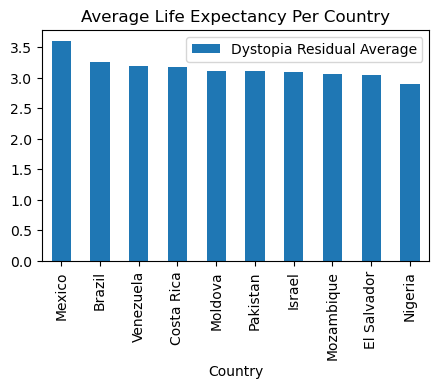

<Figure size 640x480 with 0 Axes>

In [281]:
#use dataframe.plot() in order to creat a bar chart
highest_10_dystopiares.plot(kind="bar", figsize=(5,3))

#set a title for the chart
plt.title("Average Life Expectancy Per Country")

plt.show()
plt.tight_layout()

In [282]:
lowest_10_dystopiares = Dystopia_plot.nsmallest(10, ['Dystopia Residual Average'])
lowest_10_dystopiares

,Dystopia Residual Average
Country,
Syria,0.32858
Hong Kong,0.65429
Rwanda,0.67042
Sri Lanka,0.67108
Bulgaria,0.89991
Cambodia,0.98195
Gabon,0.99895
Dominican Republic,1.21305
Hungary,1.24074


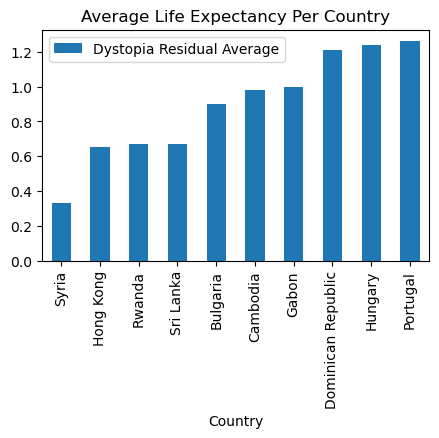

<Figure size 640x480 with 0 Axes>

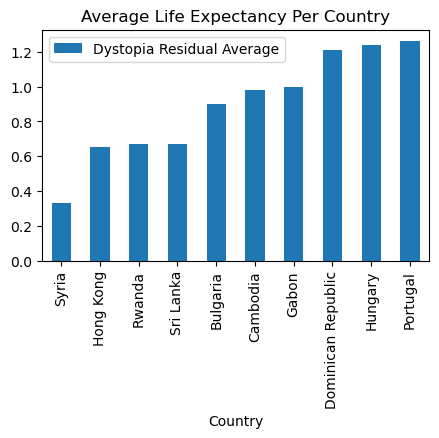

<Figure size 640x480 with 0 Axes>

In [283]:
#use dataframe.plot() in order to creat a bar chart
lowest_10_dystopiares.plot(kind="bar", figsize=(5,3))

#set a title for the chart
plt.title("Average Life Expectancy Per Country")

plt.show()
plt.tight_layout()#use dataframe.plot() in order to creat a bar chart
lowest_10_dystopiares.plot(kind="bar", figsize=(5,3))

#set a title for the chart
plt.title("Average Life Expectancy Per Country")

plt.show()
plt.tight_layout()

In [284]:
#summary of health per year
Health_df = original_data[["Country", "Health (Life Expectancy)"]]
Health_df = Health_df.groupby("Country")
Health_df.mean()

#find the avrage of the data
Heal_df = Health_df.mean().reset_index()
Heal_df["Health Average"] = Heal_df.mean(axis=1)
Heal_df

#filter the dataframe
Health_plot = Heal_df[["Country", "Health Average"]]

#set the index to be "country"
Health_plot = Health_plot.set_index("Country")
Health_plot.head()

C:\Users\Pavan Krishna\AppData\Local\Temp\ipykernel_14764\52475131.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Heal_df["Health Average"] = Heal_df.mean(axis=1)


,Health Average
Country,
Afghanistan,0.30335
Albania,0.81325
Algeria,0.61766
Angola,0.16683
Argentina,0.78723


In [285]:
highest_10_health = Health_plot.nlargest(10, ['Health Average'])
highest_10_health

,Health Average
Country,
Singapore,1.02525
Hong Kong,1.01328
Japan,0.99111
South Korea,0.96538
Spain,0.95562
Italy,0.95446
Iceland,0.94784
France,0.94579
Switzerland,0.94143


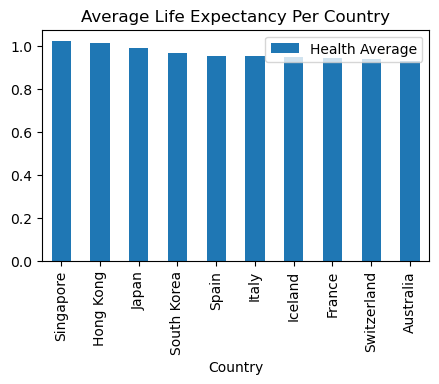

<Figure size 640x480 with 0 Axes>

In [286]:
#use dataframe.plot() in order to creat a bar chart
highest_10_health.plot(kind="bar", figsize=(5,3))

#set a title for the chart
plt.title("Average Life Expectancy Per Country")

plt.show()
plt.tight_layout()

In [287]:
#list top 10 countries with the lowest average 
lowest_10_health = Health_plot.nsmallest(10, ['Health Average'])
lowest_10_health

,Health Average
Country,
Sierra Leone,0.00000
Botswana,0.04776
Central African Republic,0.06699
Swaziland,0.07566
Lesotho,0.07612
Mozambique,0.09131
Congo (Kinshasa),0.09806
Chad,0.15010
Ivory Coast,0.15185


# family

In [288]:
#summary of family per year
Family_df = original_data[["Country", "Family"]]
Family_df = Family_df.groupby("Country")
Family_df.mean()

#find the avrage of the data
Fam_df = Health_df.mean().reset_index()
Fam_df["Family Average"] = Fam_df.mean(axis=1)
Fam_df

#filter the dataframe
Family_plot = Fam_df[["Country", "Family Average"]]

#set the index to be "country"
Family_plot = Family_plot.set_index("Country")
Family_plot.head()

C:\Users\Pavan Krishna\AppData\Local\Temp\ipykernel_14764\918742900.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Fam_df["Family Average"] = Fam_df.mean(axis=1)


,Family Average
Country,
Afghanistan,0.30335
Albania,0.81325
Algeria,0.61766
Angola,0.16683
Argentina,0.78723


In [289]:
highest_10_family = Family_plot.nlargest(10, ['Family Average'])
highest_10_family

,Family Average
Country,
Singapore,1.02525
Hong Kong,1.01328
Japan,0.99111
South Korea,0.96538
Spain,0.95562
Italy,0.95446
Iceland,0.94784
France,0.94579
Switzerland,0.94143


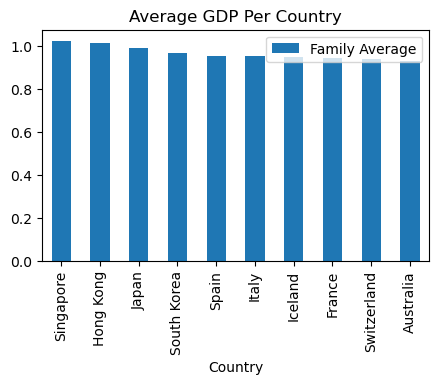

<Figure size 640x480 with 0 Axes>

In [290]:
#use dataframe.plot() in order to creat a bar chart
highest_10_family.plot(kind="bar", figsize=(5,3))

#set a title for the chart
plt.title("Average GDP Per Country")

plt.show()
plt.tight_layout()

In [291]:
#list top 10 countries with the lowest average 
lowest_10_family = Family_plot.nsmallest(10, ['Family Average'])
lowest_10_family

,Family Average
Country,
Sierra Leone,0.00000
Botswana,0.04776
Central African Republic,0.06699
Swaziland,0.07566
Lesotho,0.07612
Mozambique,0.09131
Congo (Kinshasa),0.09806
Chad,0.15010
Ivory Coast,0.15185


# freedom

In [292]:
#summary of Freedom score
Freedom_df = original_data[["Country", "Freedom"]]
Freedom_df = Freedom_df.groupby("Country")
Freedom_df.mean()

#find the average of data
Free_df = Freedom_df.mean().reset_index()
Free_df["Freedom Average"] = Free_df.mean(axis=1)
Free_df

#filter the dataframe
Freedom_plot = Free_df[["Country", "Freedom Average"]]

#set the index to be "country"
Freedom_plot = Freedom_plot.set_index("Country")
Freedom_plot.head()

C:\Users\Pavan Krishna\AppData\Local\Temp\ipykernel_14764\1680044773.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Free_df["Freedom Average"] = Free_df.mean(axis=1)


,Freedom Average
Country,
Afghanistan,0.23414
Albania,0.35733
Algeria,0.28579
Angola,0.10384
Argentina,0.44974


In [293]:
# List of top 10 countries with highest Freedom average
highest_10_Freedom = Freedom_plot.nlargest(10,['Freedom Average'])
highest_10_Freedom

,Freedom Average
Country,
Norway,0.66973
Switzerland,0.66557
Cambodia,0.66246
Sweden,0.65980
Uzbekistan,0.65821
Australia,0.65124
Denmark,0.64938
Finland,0.64169
United Arab Emirates,0.64157


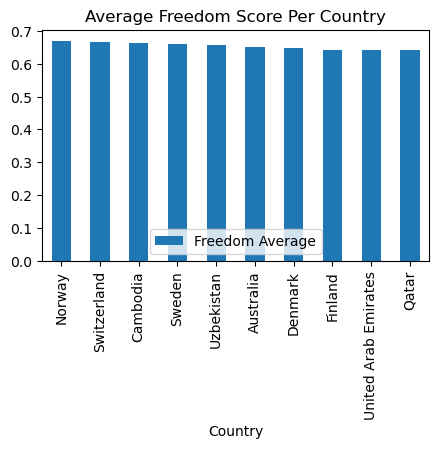

<Figure size 640x480 with 0 Axes>

In [294]:
# Using Dataframe.plot() to create a bar chart of data
highest_10_Freedom.plot(kind = "bar", figsize = (5,3))
plt.title("Average Freedom Score Per Country")
plt.show()
plt.tight_layout()

In [295]:
#List of top 10 countries with lowest Freedom Average
lowest_10_Freedom = Freedom_plot.nsmallest(10,['Freedom Average'])
lowest_10_Freedom

,Freedom Average
Country,
Iraq,0.00000
Greece,0.07699
Bosnia and Herzegovina,0.09245
Sudan,0.10081
Angola,0.10384
Burundi,0.11850
Pakistan,0.12102
Syria,0.15684
Egypt,0.17288


# Happiness Score

In [296]:
# Summary of Happiness Score per year
Happiness_df = original_data[["Country", "Happiness Score"]]
Happiness_df = Happiness_df.groupby("Country")
Happiness_df.mean()

,Happiness Score
Country,
Afghanistan,3.575
Albania,4.959
Algeria,5.605
Angola,4.033
Argentina,6.574
...,...
Venezuela,6.810
Vietnam,5.360
Yemen,4.077


In [297]:
# Average of the data
Happ_df = Happiness_df.mean().reset_index()
Happ_df["Happiness Average"] = Happ_df.mean(axis=1)
Happ_df

C:\Users\Pavan Krishna\AppData\Local\Temp\ipykernel_14764\3664804935.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Happ_df["Happiness Average"] = Happ_df.mean(axis=1)


,Country,Happiness Score,Happiness Average
0,Afghanistan,3.575,3.575
1,Albania,4.959,4.959
2,Algeria,5.605,5.605
3,Angola,4.033,4.033
4,Argentina,6.574,6.574
...,...,...,...
153,Venezuela,6.810,6.810
154,Vietnam,5.360,5.360
155,Yemen,4.077,4.077
156,Zambia,5.129,5.129


In [298]:
# Filtering dataframe to columns to chart
Happiness_plot = Happ_df[["Country", "Happiness Average"]]

# Set  index to country so they can be used as labels
Happiness_plot = Happiness_plot.set_index("Country")
Happiness_plot.head()


,Happiness Average
Country,
Afghanistan,3.575
Albania,4.959
Algeria,5.605
Angola,4.033
Argentina,6.574


In [299]:
# List of top 10 countries with highest happiness average
highest_10_Happiness = Happiness_plot.nlargest(10,['Happiness Average'])
highest_10_Happiness

,Happiness Average
Country,
Switzerland,7.587
Iceland,7.561
Denmark,7.527
Norway,7.522
Canada,7.427
Finland,7.406
Netherlands,7.378
Sweden,7.364
New Zealand,7.286


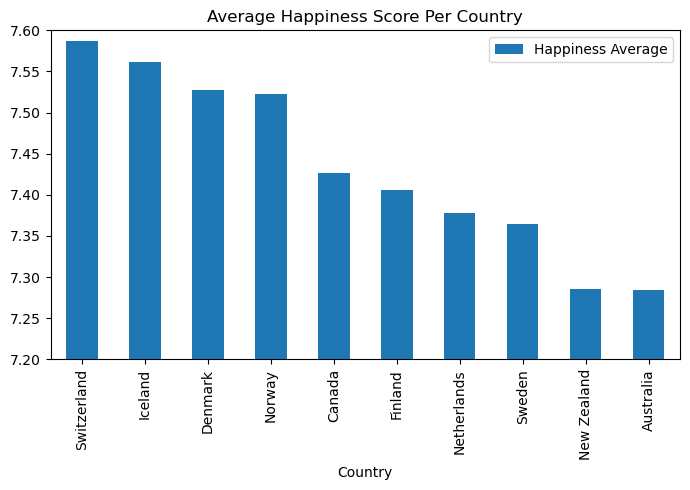

In [300]:
# Using Dataframe.plot()  in order to create a bar chart of the data

highest_10_Happiness.plot(kind="bar",figsize=(7,5))
plt.ylim(7.2,7.6)
plt.title("Average Happiness Score Per Country")
plt.tight_layout()

plt.show()

In [301]:
# highest_10_Happiness.head(10)
df=highest_10_Happiness.reset_index()
df

,Country,Happiness Average
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
5,Finland,7.406
6,Netherlands,7.378
7,Sweden,7.364
8,New Zealand,7.286
9,Australia,7.284


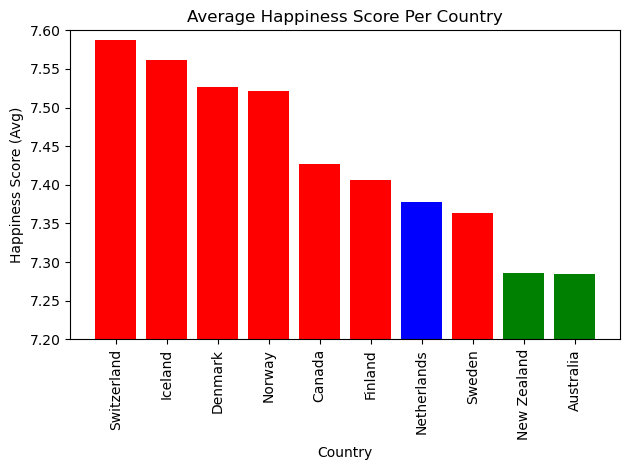

In [302]:
labels = df["Country"]
values = df["Happiness Average"]

# Change the bar colors here
plt.bar(labels, values, color = ['red','red','red','red','red','red','blue','red','green','green'])

plt.xticks(rotation=90)
plt.ylim(7.2,7.6)

plt.title("Average Happiness Score Per Country")
plt.ylabel('Happiness Score (Avg)')
plt.xlabel('Country')

#Save and show plot
plt.tight_layout()
plt.show()

In [303]:
# List of top 10 countries with the lowest happiness average
lowest_10_Happiness = Happiness_plot.nsmallest(10,['Happiness Average'])
lowest_10_Happiness

,Happiness Average
Country,
Togo,2.839
Burundi,2.905
Syria,3.006
Benin,3.340
Rwanda,3.465
Afghanistan,3.575
Burkina Faso,3.587
Ivory Coast,3.655
Guinea,3.656


# Economy (GDP per Capita)

In [304]:
# Summary of Happiness per year
Economy_df = original_data[["Country","Economy (GDP per Capita)"]]
Economy_df = Economy_df.groupby("Country")
Economy_df.mean()


,Economy (GDP per Capita)
Country,
Afghanistan,0.31982
Albania,0.87867
Algeria,0.93929
Angola,0.75778
Argentina,1.05351
...,...
Venezuela,1.04424
Vietnam,0.63216
Yemen,0.54649


In [305]:
#average of data
Econo_df = Economy_df.mean().reset_index()
Econo_df["Economy GDP Average"] = Econo_df.mean(axis=1)
Econo_df

C:\Users\Pavan Krishna\AppData\Local\Temp\ipykernel_14764\1460290341.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Econo_df["Economy GDP Average"] = Econo_df.mean(axis=1)


,Country,Economy (GDP per Capita),Economy GDP Average
0,Afghanistan,0.31982,0.31982
1,Albania,0.87867,0.87867
2,Algeria,0.93929,0.93929
3,Angola,0.75778,0.75778
4,Argentina,1.05351,1.05351
...,...,...,...
153,Venezuela,1.04424,1.04424
154,Vietnam,0.63216,0.63216
155,Yemen,0.54649,0.54649
156,Zambia,0.47038,0.47038


In [306]:
#filtering DataFrame down to columns and chart
Economy_plot = Econo_df[["Country","Economy GDP Average"]]

#setting the index to be "Country" as labels
Economy_plot = Economy_plot.set_index("Country")
Economy_plot.head()
Economy_plot.head()

,Economy GDP Average
Country,
Afghanistan,0.31982
Albania,0.87867
Algeria,0.93929
Angola,0.75778
Argentina,1.05351


In [307]:
# List of top 10 Countries with highest Economy GDP Average
highest_10_Economy = Economy_plot.nlargest(10,['Economy GDP Average'])
highest_10_Economy

,Economy GDP Average
Country,
Qatar,1.69042
Luxembourg,1.56391
Kuwait,1.55422
Singapore,1.52186
Norway,1.45900
United Arab Emirates,1.42727
Switzerland,1.39651
Saudi Arabia,1.39541
United States,1.39451


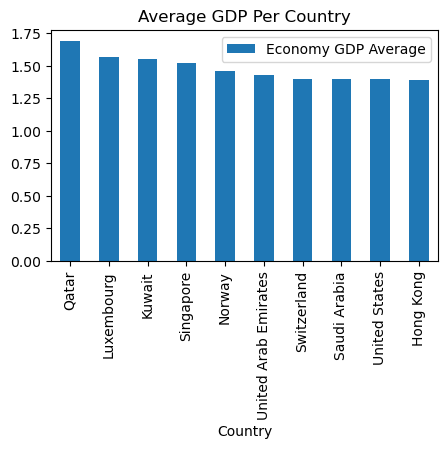

<Figure size 640x480 with 0 Axes>

In [308]:
# USing DataFrame.plot() to create bar chart of data
highest_10_Economy.plot(kind="bar",figsize=(5,3))
plt.title("Average GDP Per Country")
plt.show()
plt.tight_layout()

In [309]:
#list top 10 Countries with the lowest Economy GDP Average
lowest_10_Economy = Economy_plot.nsmallest(10,['Economy GDP Average'])
lowest_10_Economy

,Economy GDP Average
Country,
Congo (Kinshasa),0.00000
Burundi,0.01530
Malawi,0.01604
Niger,0.06940
Liberia,0.07120
Central African Republic,0.07850
Mozambique,0.08308
Guinea,0.17417
Somaliland region,0.18847


# Merging Averages to One DataFrame

In [310]:
#merging all  avg columns together and ordered in top 10 Countries with highest Happiness Average
#merging Data on Country
Comparison_data = pd.merge(GOV_plot, Gen_plot, on = ["Country"], how = "outer")
Comparison_data = pd.merge(Comparison_data, Health_plot, on = ["Country"], how = "outer")
Comparison_data = pd.merge(Comparison_data, Family_plot, on = ["Country"], how = "outer")
Comparison_data = pd.merge(Comparison_data, Economy_plot, on = ["Country"], how = "outer")
Comparison_data = pd.merge(Comparison_data, Freedom_plot, on = ["Country"], how = "outer")
Comparison_data = pd.merge(Comparison_data, Happiness_plot, on = ["Country"], how = "outer")

top_ten_Comparison_data = Comparison_data.nlargest(10, ['Happiness Average'])
top_ten_Comparison_data

,Gov Trust Average,Generocity Average,Health Average,Family Average,Economy GDP Average,Freedom Average,Happiness Average
Country,,,,,,,
Switzerland,0.41978,0.29678,0.94143,0.94143,1.39651,0.66557,7.587
Iceland,0.14145,0.43630,0.94784,0.94784,1.30232,0.62877,7.561
Denmark,0.48357,0.34139,0.87464,0.87464,1.32548,0.64938,7.527
Norway,0.36503,0.34699,0.88521,0.88521,1.45900,0.66973,7.522
Canada,0.32957,0.45811,0.90563,0.90563,1.32629,0.63297,7.427
Finland,0.41372,0.23351,0.88911,0.88911,1.29025,0.64169,7.406
Netherlands,0.31814,0.47610,0.89284,0.89284,1.32944,0.61576,7.378
Sweden,0.43844,0.36262,0.91087,0.91087,1.33171,0.65980,7.364
New Zealand,0.42922,0.47501,0.90837,0.90837,1.25018,0.63938,7.286


In [311]:
#sort data in ascending order based on Average
Comp_data_df = Comparison_data.sort_values(
        ["Economy GDP Average", "Freedom Average"], ascending=False)
Comp_data_df.head(10)

,Gov Trust Average,Generocity Average,Health Average,Family Average,Economy GDP Average,Freedom Average,Happiness Average
Country,,,,,,,
Qatar,0.52208,0.32573,0.79733,0.79733,1.69042,0.64040,6.611
Luxembourg,0.37798,0.28034,0.91894,0.91894,1.56391,0.61583,6.946
Kuwait,0.25609,0.16228,0.72492,0.72492,1.55422,0.55499,6.295
Singapore,0.49210,0.31105,1.02525,1.02525,1.52186,0.54252,6.798
Norway,0.36503,0.34699,0.88521,0.88521,1.45900,0.66973,7.522
United Arab Emirates,0.38583,0.26428,0.80925,0.80925,1.42727,0.64157,6.901
Switzerland,0.41978,0.29678,0.94143,0.94143,1.39651,0.66557,7.587
Saudi Arabia,0.32524,0.13706,0.72025,0.72025,1.39541,0.31048,6.411
United States,0.15890,0.40105,0.86179,0.86179,1.39451,0.54604,7.119


# ANNOVA

In [312]:
#performing analysis of variance
st.f_oneway(Comp_data_df["Gov Trust Average"],
           Comp_data_df["Generocity Average"],
           Comp_data_df["Family Average"],
           Comp_data_df["Economy GDP Average"],
           Comp_data_df["Freedom Average"])

F_onewayResult(statistic=234.70917059514147, pvalue=1.75216279753545e-132)

# Correlation 

In [313]:
GDP = Comp_data_df.iloc[:,4]
Free = Comp_data_df.iloc[:,5]
correlation = st.pearsonr(GDP,Free)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.37


The correlation between both factors is 0.37


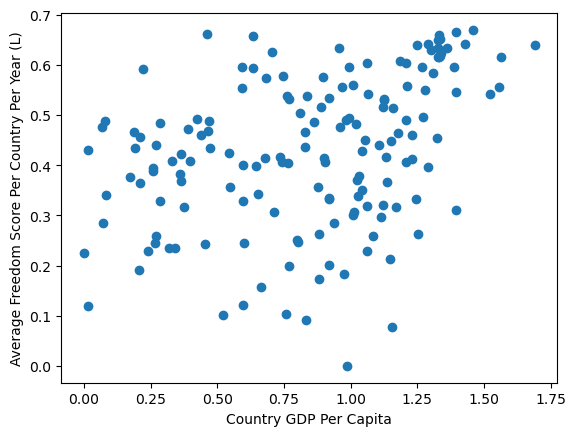

In [314]:
plt.scatter(GDP, Free)
plt.xlabel('Country GDP Per Capita')
plt.ylabel('Average Freedom Score Per Country Per Year (L)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [315]:
#generation of correlation matrix
all_data = Comp_data_df.corr()
all_data.unstack().sort_values()

Economy GDP Average  Generocity Average    -0.010465
Generocity Average   Economy GDP Average   -0.010465
Family Average       Generocity Average     0.108335
Health Average       Generocity Average     0.108335
Generocity Average   Family Average         0.108335
                     Health Average         0.108335
Happiness Average    Generocity Average     0.180319
Generocity Average   Happiness Average      0.180319
Family Average       Gov Trust Average      0.248335
Health Average       Gov Trust Average      0.248335
Gov Trust Average    Health Average         0.248335
                     Family Average         0.248335
Generocity Average   Gov Trust Average      0.276123
Gov Trust Average    Generocity Average     0.276123
Economy GDP Average  Gov Trust Average      0.307885
Gov Trust Average    Economy GDP Average    0.307885
Family Average       Freedom Average        0.360477
Freedom Average      Family Average         0.360477
Health Average       Freedom Average        0.

                     Gov Trust Average  Generocity Average  Health Average  \
Gov Trust Average             1.000000            0.276123        0.248335   
Generocity Average            0.276123            1.000000        0.108335   
Health Average                0.248335            0.108335        1.000000   
Family Average                0.248335            0.108335        1.000000   
Economy GDP Average           0.307885           -0.010465        0.816478   

                     Family Average  Economy GDP Average  Freedom Average  \
Gov Trust Average          0.248335             0.307885         0.493524   
Generocity Average         0.108335            -0.010465         0.373916   
Health Average             1.000000             0.816478         0.360477   
Family Average             1.000000             0.816478         0.360477   
Economy GDP Average        0.816478             1.000000         0.370300   

                     Happiness Average  
Gov Trust Average          

<AxesSubplot:>

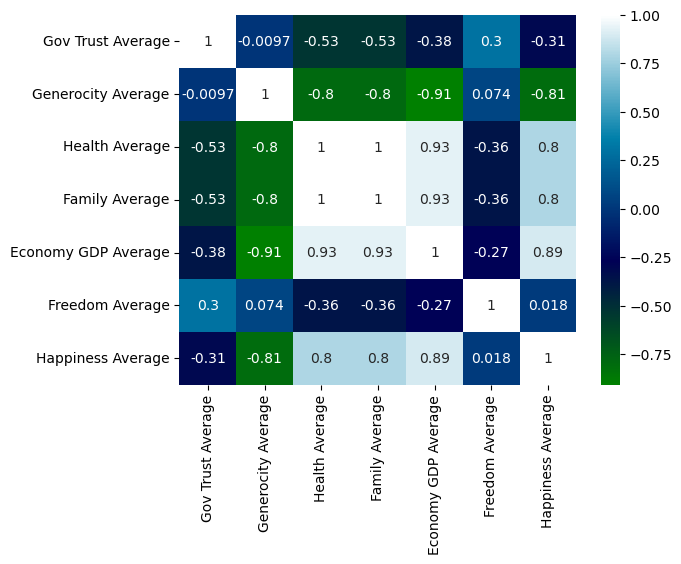

In [316]:
print(all_data.head())
sns.heatmap(all_data.corr(),annot=True, cmap='ocean')

# #  Linear Regression - Top Ten Countries

# Trust (Government Corruption)

y = -0.25x + 7.53
The r-value is: 0.04831701507725444


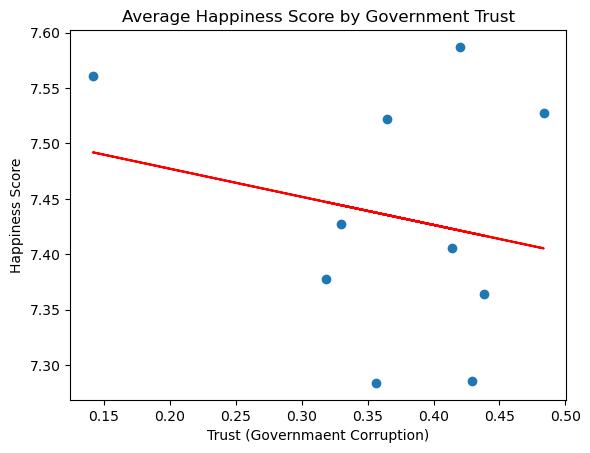

In [317]:
# Linear Regression X and Y axis
x_values = top_ten_Comparison_data["Gov Trust Average"]
y_values = top_ten_Comparison_data["Happiness Average"]

# Linear regression on temperature vs latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# regression values
regress_values = x_values * slope + intercept

#line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

#create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Trust (Governmaent Corruption)")
plt.ylabel("Happiness Score")
plt.title(f'Average Happiness Score by Government Trust')
#plt.annotate(line_eq,(5,10),fontsize=15,color="r")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Generocity

y = -0.57x + 7.65
The r-value is: 0.18348525590760906


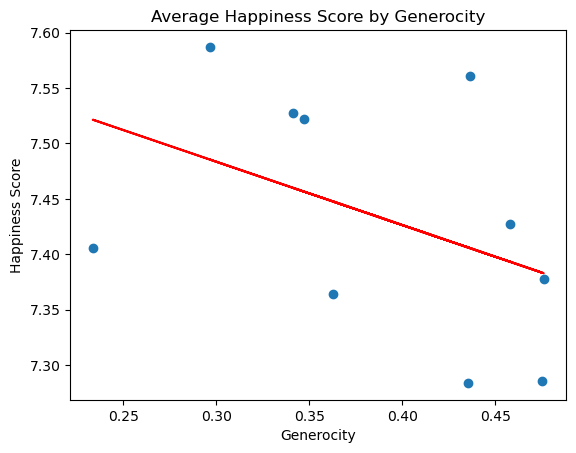

In [318]:
x_values = top_ten_Comparison_data["Generocity Average"]
y_values = top_ten_Comparison_data["Happiness Average"]

# linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# regression values
regress_values = x_values * slope + intercept

# line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Generocity")
plt.ylabel("Happiness Score")
plt.title(f'Average Happiness Score by Generocity')
#plt.annotate(line_eq,(5,10),fontsize=15,color="r")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Health (Life Expectancy)

y = 0.49x + 6.99
The r-value is: 0.011895050117043116


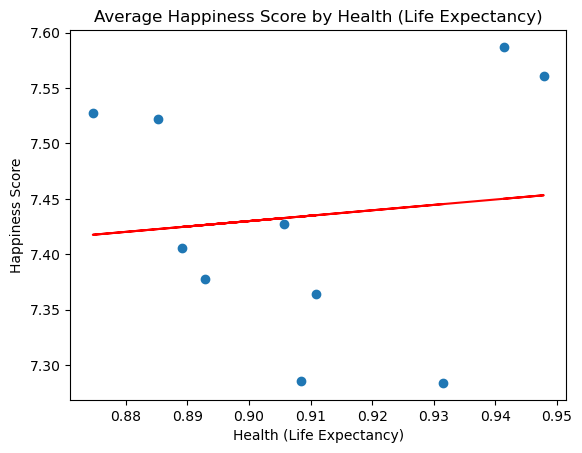

In [319]:
# Linear regression X and Y axis
x_values = top_ten_Comparison_data["Health Average"]
y_values = top_ten_Comparison_data["Happiness Average"]

# linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# regression values
regress_values = x_values * slope + intercept

# line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Happiness Score")
plt.title(f'Average Happiness Score by Health (Life Expectancy)')
#plt.annotate(line_eq,(5,10),fontsize=15,color="r")
print(f"The r-value is: {rvalue**2}")
plt.show()


# Family

y = 0.49x + 6.99
The r-value is: 0.011895050117043116


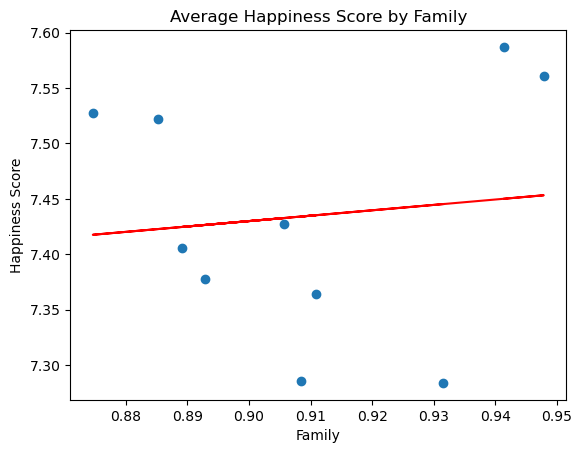

In [320]:
# Linear regression X and Y axis
x_values = top_ten_Comparison_data["Family Average"]
y_values = top_ten_Comparison_data["Happiness Average"]

# linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel("Family")
plt.ylabel("Happiness Score")
plt.title(f'Average Happiness Score by Family')
#plt.annotate(line_eq,(5,10),fontsize=15,color="r")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Freedom

y = 1.66x + 6.36
The r-value is: 0.06602705658535929


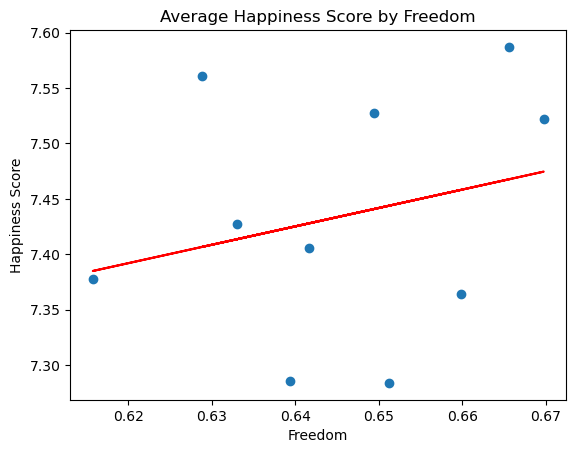

In [321]:
# Linear regression X and Y axis
x_values = top_ten_Comparison_data["Freedom Average"]
y_values = top_ten_Comparison_data["Happiness Average"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.title(f'Average Happiness Score by Freedom')
#plt.annotate(line_eq,(5,10),fontsize=15,color="r")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Economy (GDP per Capita)

y = 1.01x + 6.09
The r-value is: 0.2764684604781141


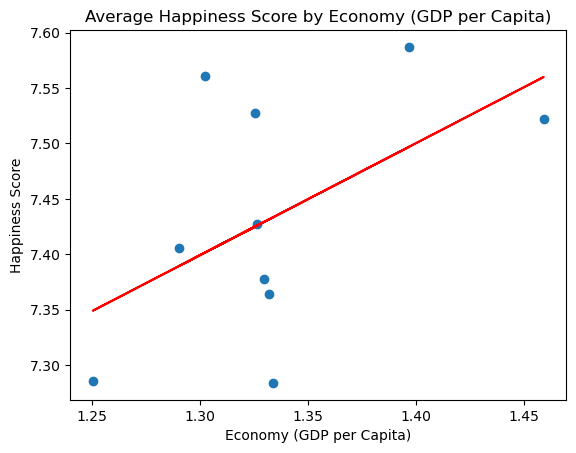

In [322]:
# Linear regression X and Y axis
x_values = top_ten_Comparison_data["Economy GDP Average"]
y_values = top_ten_Comparison_data["Happiness Average"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.title(f'Average Happiness Score by Economy (GDP per Capita)')
#plt.annotate(line_eq,(5,10),fontsize=15,color="r")
print(f"The r-value is: {rvalue**2}")
plt.show()

y = 2.22x + 3.5
The r-value is: 0.609907154153122
The p-value is: 1.0505384131959592e-33


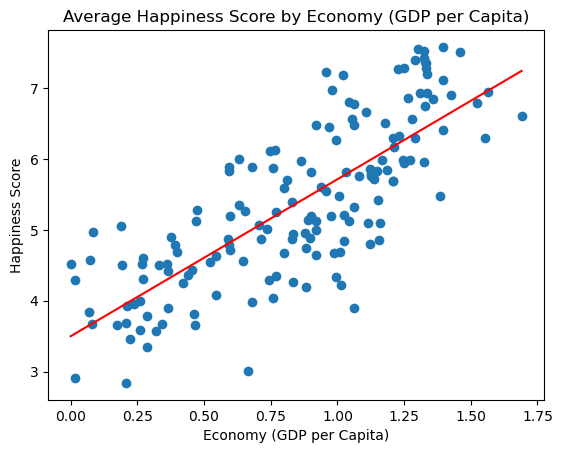

In [323]:
# Economy (GDP per Capita) all Countries
# X and Y regression
x_values = Comp_data_df["Economy GDP Average"]
y_values = Comp_data_df["Happiness Average"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.title(f'Average Happiness Score by Economy (GDP per Capita)')
#plt.annotate(line_eq,(5,10),fontsize=15,color="r")
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

# Region

In [324]:
#Summary of Happiness per year
Happiness_df = original_data[["Country","Region","Happiness Score"]]
Happiness_df = Happiness_df.groupby("Region")
Happiness_df.mean()
Happ_df = Happiness_df.mean().reset_index()
Happ_df["Happiness Average"] = Happ_df.mean(axis=1)
Happiness_plot = Happ_df[["Region", "Happiness Average"]]
Happiness_plot = Happiness_plot.set_index("Region")
Happiness_plot.head(10)

C:\Users\Pavan Krishna\AppData\Local\Temp\ipykernel_14764\44808.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Happ_df["Happiness Average"] = Happ_df.mean(axis=1)


,Happiness Average
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [325]:
dp=Happiness_plot.reset_index()
dp.sort_values(by=['Happiness Average'], inplace=True, ascending=False)
dp

,Region,Happiness Average
0,Australia and New Zealand,7.285000
5,North America,7.273000
9,Western Europe,6.689619
3,Latin America and Caribbean,6.144682
2,Eastern Asia,5.626167
4,Middle East and Northern Africa,5.406900
1,Central and Eastern Europe,5.332931
6,Southeastern Asia,5.317444
7,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


<function matplotlib.pyplot.show(close=None, block=None)>

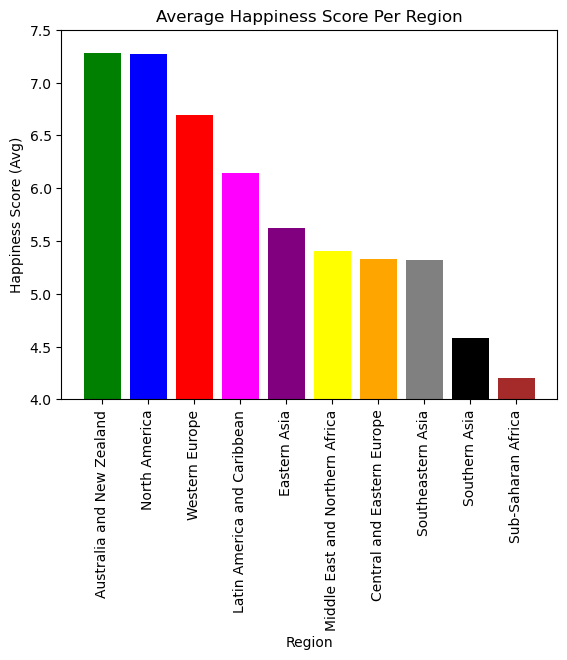

In [326]:
labels = dp["Region"]
values = dp["Happiness Average"]
plt.bar(labels, values, color=['green', 'blue', 'red', 'magenta', 'purple', 'yellow', 'orange', 'grey', 'black', 'brown'])
plt.xticks(rotation=90)
plt.ylim(4, 7.5)
plt.title("Average Happiness Score Per Region")
plt.ylabel('Happiness Score (Avg)')
plt.xlabel('Region')
plt.show

# Dystopia Residual

In [327]:
#Summary of Happiness per year
Happiness_df = original_data[["Country","Dystopia Residual","Happiness Score"]]
Happiness_df = Happiness_df.groupby("Dystopia Residual")
Happiness_df.mean()
Happ_df = Happiness_df.mean().reset_index()
Happ_df["Happiness Average"] = Happ_df.mean(axis=1)
Happiness_plot = Happ_df[["Dystopia Residual", "Happiness Average"]]
Happiness_plot = Happiness_plot.set_index("Dystopia Residual")
Happiness_plot.head(10)

,Happiness Average
Dystopia Residual,
0.32858,1.667290
0.65429,3.064145
0.67042,2.067710
0.67108,2.471040
0.89991,2.558955
0.98195,2.400475
0.99895,2.447475
1.21305,3.049025
1.24074,3.020370


In [328]:
dp=Happiness_plot.reset_index()
dp.sort_values(by=['Happiness Average'], inplace=True, ascending=False)
dp

,Dystopia Residual,Happiness Average
157,3.60214,5.394570
154,3.17728,5.201640
151,3.08854,5.183270
134,2.70201,5.131505
156,3.26001,5.121505
...,...,...
5,0.98195,2.400475
44,1.83302,2.369010
19,1.56726,2.203130
2,0.67042,2.067710


<function matplotlib.pyplot.show(close=None, block=None)>

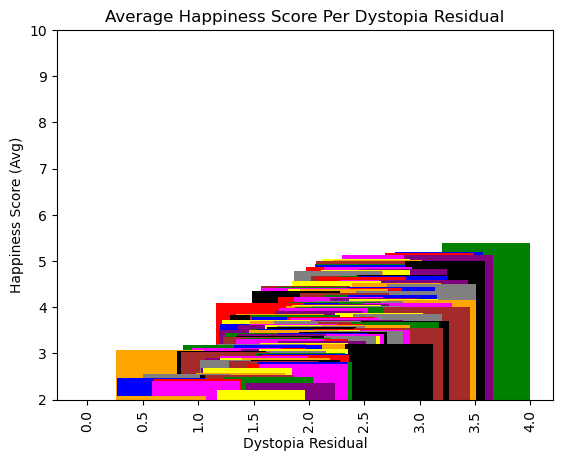

In [329]:
labels = dp["Dystopia Residual"]
values = dp["Happiness Average"]
plt.bar(labels, values, color=['green', 'blue', 'red', 'magenta', 'purple', 'yellow', 'orange', 'grey', 'black', 'brown'])
plt.xticks(rotation=90)
plt.ylim(2, 10)
plt.title("Average Happiness Score Per Dystopia Residual")
plt.ylabel('Happiness Score (Avg)')
plt.xlabel('Dystopia Residual')
plt.show